In [1]:
import kaggle
kaggle.api.authenticate()


In [2]:
kaggle.api.dataset_download_files(
    'rodsaldanha/arketing-campaign',
    path='data',
    unzip=True
)

In [3]:
import os
os.environ["OMP_NUM_THREADS"] = '9'
import numpy as np
import pandas as pd
customer_data = pd.customer_data = pd.read_csv("data/marketing_campaign.csv", sep=";")

In [4]:
customer_data = customer_data.drop(
    columns="ID Education Marital_Status AcceptedCmp1 AcceptedCmp2 AcceptedCmp3 AcceptedCmp4 AcceptedCmp5 Response".split(),
)

In [5]:
customer_data.Dt_Customer = pd.to_datetime(customer_data.Dt_Customer)
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Year_Birth           2240 non-null   int64         
 1   Income               2216 non-null   float64       
 2   Kidhome              2240 non-null   int64         
 3   Teenhome             2240 non-null   int64         
 4   Dt_Customer          2240 non-null   datetime64[ns]
 5   Recency              2240 non-null   int64         
 6   MntWines             2240 non-null   int64         
 7   MntFruits            2240 non-null   int64         
 8   MntMeatProducts      2240 non-null   int64         
 9   MntFishProducts      2240 non-null   int64         
 10  MntSweetProducts     2240 non-null   int64         
 11  MntGoldProds         2240 non-null   int64         
 12  NumDealsPurchases    2240 non-null   int64         
 13  NumWebPurchases      2240 non-nul

In [6]:
customer_data.isnull().sum()

Year_Birth              0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Complain                0
Z_CostContact           0
Z_Revenue               0
dtype: int64

In [7]:
customer_data = customer_data.dropna()
customer_data.isnull().sum()

Year_Birth             0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
Complain               0
Z_CostContact          0
Z_Revenue              0
dtype: int64

In [8]:
amount_spent_columns = [c for c in customer_data.columns if c.startswith("Mnt")]
customer_data["Total_amount_spent"] = customer_data[amount_spent_columns].sum(axis=1)
total_children_columns = ["Kidhome","Teenhome"]
customer_data["Total_children"] = customer_data.Kidhome + customer_data.Teenhome
customer_purchases_web_visits_columns = [c for c in customer_data.columns if c.startswith("Num")]
customer_data["Customer_purchases_web_visits"] = customer_data[customer_purchases_web_visits_columns].sum(axis=1)
customer_data = customer_data.drop(columns=amount_spent_columns + total_children_columns + customer_purchases_web_visits_columns)

In [9]:
customer_data["Length_of_association"] = (pd.to_datetime("2022-12-31") - customer_data.Dt_Customer).dt.days
customer_data.Length_of_association = customer_data.Length_of_association.div(30).astype(int)
customer_data = customer_data.drop(columns=customer_data.Dt_Customer.name)
customer_data.sample(5).T

1596     626      686      345      1572
Year_Birth                      1960.0   1975.0   1972.0   1952.0   1991.0
Income                         17144.0  84196.0  86857.0  82623.0  90638.0
Recency                           96.0     56.0     96.0     58.0     29.0
Complain                           0.0      0.0      0.0      0.0      0.0
Z_CostContact                      3.0      3.0      3.0      3.0      3.0
Z_Revenue                         11.0     11.0     11.0     11.0     11.0
Total_amount_spent                47.0   1237.0   2114.0    940.0   2525.0
Total_children                     2.0      1.0      0.0      0.0      0.0
Customer_purchases_web_visits     19.0     23.0     24.0     17.0     19.0
Length_of_association            108.0    116.0    125.0    111.0    108.0

In [10]:
customer_data["Age"] = 2021 - customer_data.Year_Birth

customer_data = customer_data.drop(columns=customer_data.Year_Birth.name)

In [11]:
customer_data.describe().T

count          mean           std     min  \
Income                         2216.0  52247.251354  25173.076661  1730.0   
Recency                        2216.0     49.012635     28.948352     0.0   
Complain                       2216.0      0.009477      0.096907     0.0   
Z_CostContact                  2216.0      3.000000      0.000000     3.0   
Z_Revenue                      2216.0     11.000000      0.000000    11.0   
Total_amount_spent             2216.0    607.075361    602.900476     5.0   
Total_children                 2216.0      0.947202      0.749062     0.0   
Customer_purchases_web_visits  2216.0     20.199910      7.283193     0.0   
Length_of_association          2216.0    114.868682      6.763425   103.0   
Age                            2216.0     52.179603     11.985554    25.0   

                                   25%      50%      75%       max  
Income                         35303.0  51381.5  68522.0  666666.0  
Recency                           24.0     49.0     74.0      99.0  
Complain                           0.0      0.0      0.0       1.0  
Z_CostContact                      3.0      3.0      3.0       3.0  
Z_Revenue                         11.0     11.0     11.0      11.0  
Total_amount_spent                69.0    396.5   1048.0    2525.0  
Total_children                     0.0      1.0      1.0       3.0  
Customer_purchases_web_visits     14.0     19.0     25.0      46.0  
Length_of_association            109.0    115.0    121.0     126.0  
Age                               44.0     51.0     62.0     128.0

In [12]:
#Drop cols with low variance
customer_data = customer_data.drop(columns=["Total_children", "Z_CostContact", "Z_Revenue"])

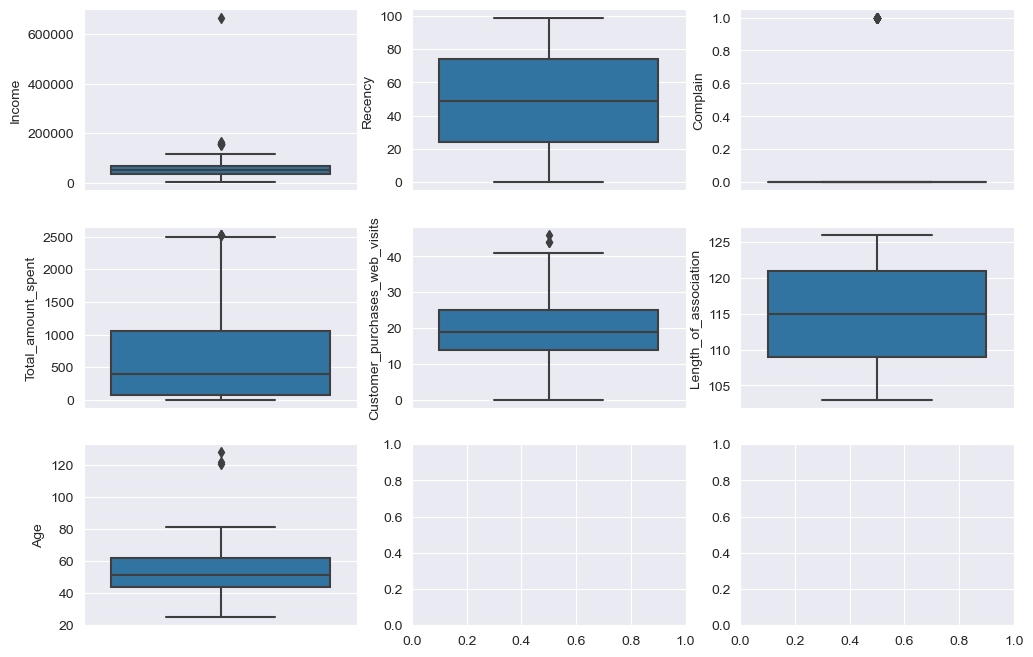

In [13]:
import seaborn as sns
from matplotlib import pyplot as plt
fig, axs = plt.subplots(nrows=3,ncols=3,sharey=False)
fig.set_size_inches(12,8)
for i, c in enumerate(customer_data.columns):
    sns.boxplot(data=customer_data, y=c, ax=axs[i//3][i%3])

In [14]:
for c in customer_data.columns:
    Q1 = customer_data[c].quantile(0.25)
    Q3 = customer_data[c].quantile(0.75)
    IQR = Q3 - Q1
    customer_data = customer_data.query(f"(@Q1 - 1.5 * @IQR) <= {c} <= (@Q3 + 1.5 * @IQR)")

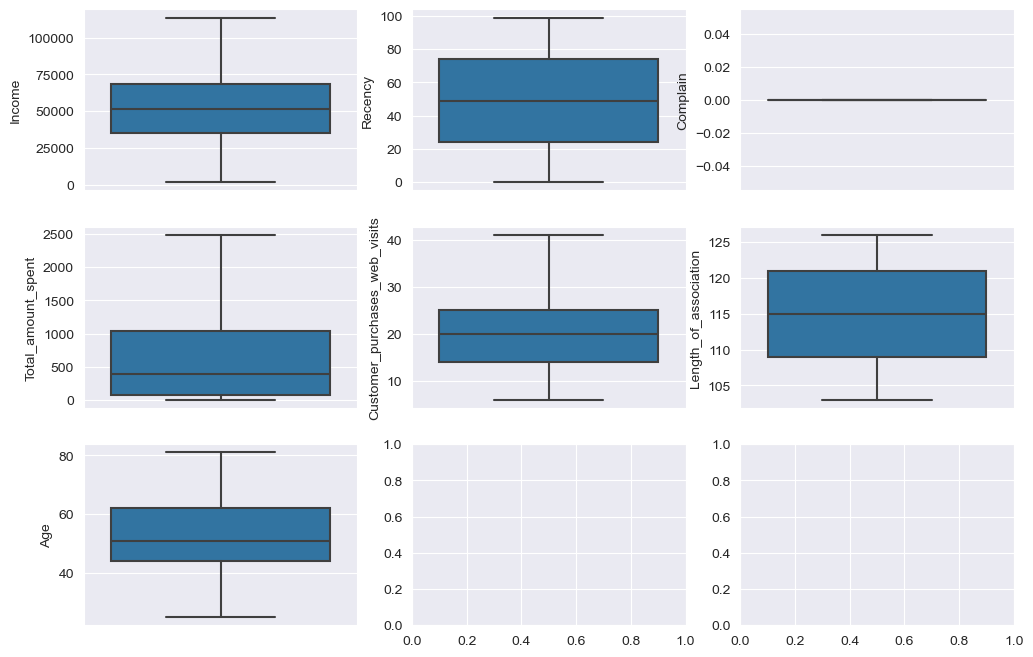

In [15]:
import seaborn as sns
from matplotlib import pyplot as plt
fig, axs = plt.subplots(nrows=3,ncols=3,sharey=False)
fig.set_size_inches(12,8)
for i, c in enumerate(customer_data.columns):
    sns.boxplot(data=customer_data, y=c, ax=axs[i//3][i%3])

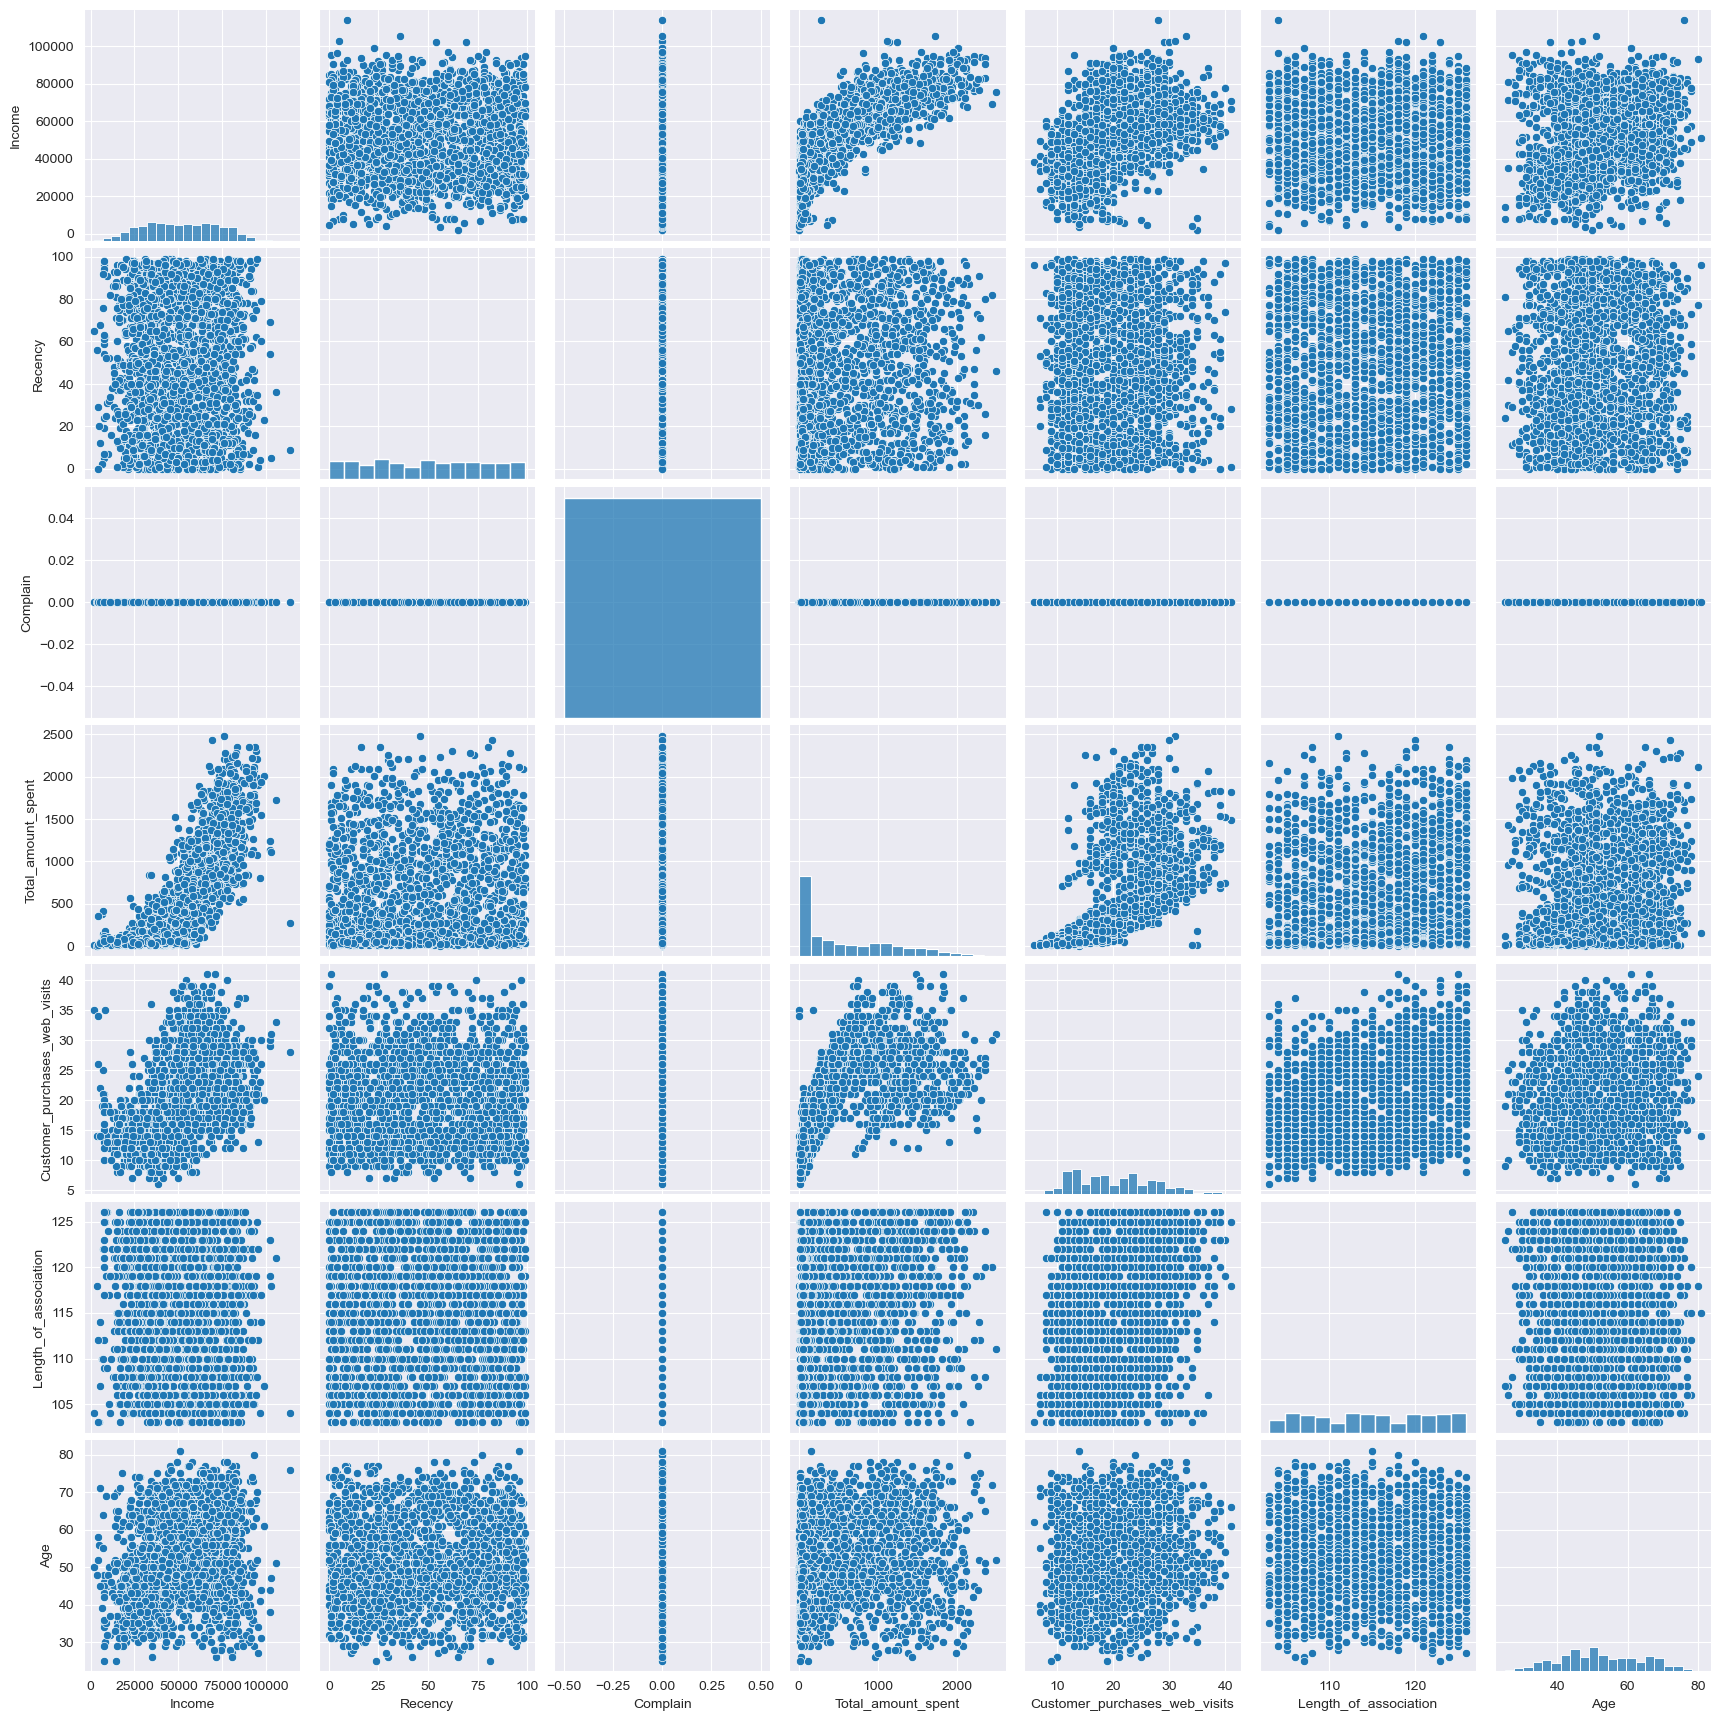

In [16]:
sns.pairplot(customer_data)

<AxesSubplot:xlabel='Income', ylabel='Total_amount_spent'>

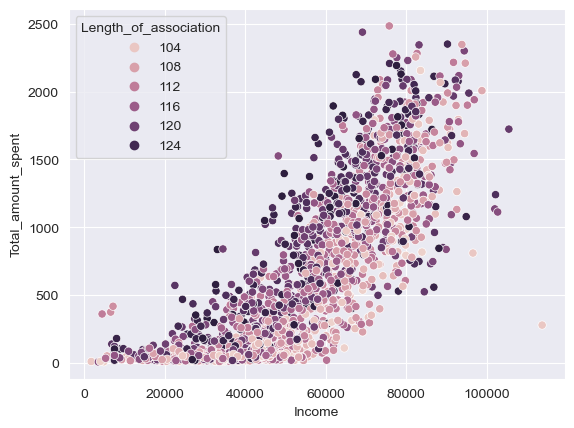

In [17]:
sns.scatterplot(data=customer_data, x = customer_data.Income, y = customer_data.Total_amount_spent, hue=customer_data.Length_of_association)

In [18]:
import plotly.express as px
px.scatter_3d(customer_data, x=customer_data.Length_of_association, y = customer_data.Income, z = customer_data.Total_amount_spent)

In [19]:
preprocessed_customer_data = customer_data[["Total_amount_spent", 'Length_of_association', 'Income']]
preprocessed_customer_data.describe()

Total_amount_spent  Length_of_association         Income
count         2180.000000            2180.000000    2180.000000
mean           605.420183             114.854128   51639.706422
std            598.604627               6.770330   20665.321380
min              5.000000             103.000000    1730.000000
25%             69.000000             109.000000   35191.500000
50%            396.500000             115.000000   51342.000000
75%           1045.500000             121.000000   68325.000000
max           2486.000000             126.000000  113734.000000

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_std = pd.DataFrame(data=scaler.fit_transform(preprocessed_customer_data), columns=preprocessed_customer_data.columns)
X_std.describe()

Total_amount_spent  Length_of_association        Income
count        2.180000e+03           2.180000e+03  2.180000e+03
mean        -3.585307e-17          -7.944715e-16  1.499310e-16
std          1.000229e+00           1.000229e+00  1.000229e+00
min         -1.003263e+00          -1.751296e+00 -2.415697e+00
25%         -8.963233e-01          -8.648725e-01 -7.961154e-01
50%         -3.490921e-01           2.155065e-02 -1.440939e-02
75%          7.353448e-01           9.079738e-01  8.075907e-01
max          3.142327e+00           1.646660e+00  3.005448e+00

In [21]:
from sklearn.preprocessing import normalize

X = pd.DataFrame(normalize(X_std, norm="l2"), columns=X_std.columns)
X.describe()

Total_amount_spent  Length_of_association       Income
count         2180.000000            2180.000000  2180.000000
mean            -0.079274               0.001487    -0.012735
std              0.563112               0.603137     0.559586
min             -0.999069              -0.999000    -0.997893
25%             -0.542424              -0.587281    -0.554486
50%             -0.330507               0.015936    -0.012404
75%              0.508582               0.556247     0.514616
max              0.969759               0.999108     0.988441

<AxesSubplot:xlabel='Income', ylabel='Length_of_association'>

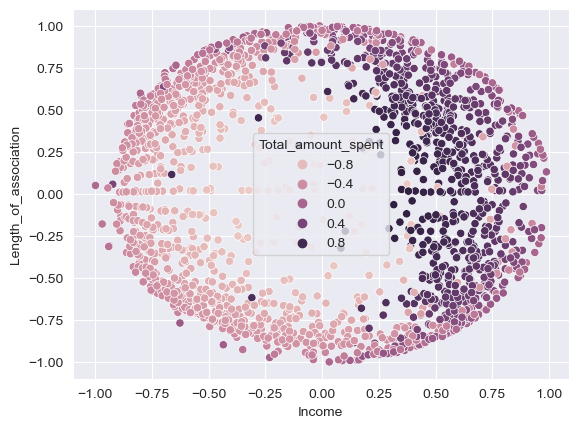

In [22]:
sns.scatterplot(x=X.Income, y = X.Length_of_association, hue=X.Total_amount_spent)

In [30]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

weighted_cluster_sum_of_squares = []
silhouette_avg = []
num_clusters = range(2,21)

for k in num_clusters:
    kmeans_model = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans_model.fit(X)
    weighted_cluster_sum_of_squares.append(kmeans_model.inertia_)
    silhouette_avg.append(silhouette_score(X, kmeans_model.labels_))



Text(0, 0.5, 'WCSS')

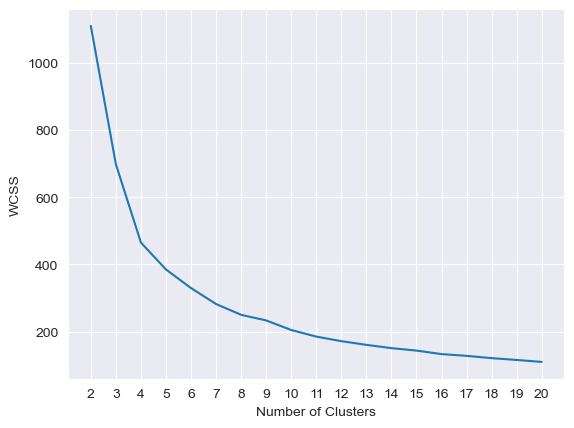

In [33]:
plt.figure()
sns.lineplot(x = num_clusters, y=weighted_cluster_sum_of_squares)
plt.xlabel('Number of Clusters')
plt.xticks(np.arange(2,21,1))
plt.ylabel('WCSS')

Text(0, 0.5, 'Silhouette Score')

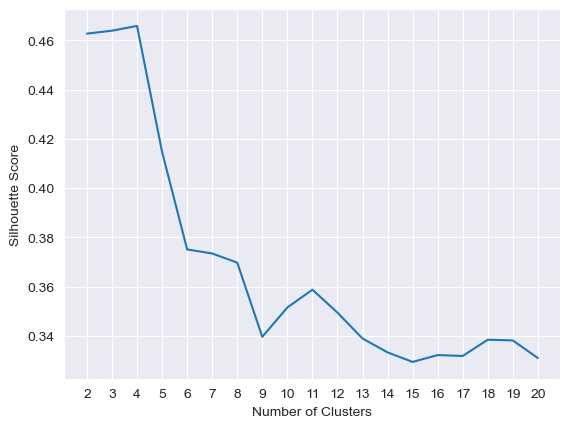

In [34]:
plt.figure()
sns.lineplot(x = num_clusters, y=silhouette_avg)
plt.xlabel('Number of Clusters')
plt.xticks(np.arange(2,21,1))
plt.ylabel('Silhouette Score')

In [35]:
k = 4
kmeans_model = KMeans(n_clusters=k, random_state=42, n_init='auto')
kmeans_model.fit(X)
X['cluster_labels'] = kmeans_model.labels_
X.head()

Total_amount_spent  Length_of_association    Income  cluster_labels
0            0.741042               0.657147  0.137892               2
1           -0.630983              -0.757534 -0.167339               3
2            0.272901              -0.262269  0.925603               1
3           -0.505010              -0.554004 -0.661849               3
4           -0.277135              -0.915644  0.291192               1

In [38]:
X.groupby('cluster_labels').mean()

Total_amount_spent  Length_of_association    Income
cluster_labels                                                     
0                        -0.485729               0.544949 -0.504612
1                         0.384938              -0.525217  0.591111
2                         0.546076               0.517491  0.468708
3                        -0.566202              -0.563436 -0.397737

In [40]:
kmeans_model.cluster_centers_

array([[-0.48572926,  0.54494907, -0.50461218],
       [ 0.3850485 , -0.52782873,  0.58962627],
       [ 0.54538189,  0.515751  ,  0.47039244],
       [-0.56620205, -0.56343615, -0.39773706]])

In [45]:
preprocessed_customer_data['cluster_labels'] = kmeans_model.labels_
preprocessed_customer_data.groupby('cluster_labels').mean()

C:\Users\Amir\AppData\Local\Temp\ipykernel_71800\3164628519.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Total_amount_spent  Length_of_association        Income
cluster_labels                                                         
0                       186.876736             120.428819  34627.236111
1                      1066.405405             108.912162  72255.157658
2                      1244.131332             120.797373  69245.996248
3                       120.524721             108.888357  37703.135566

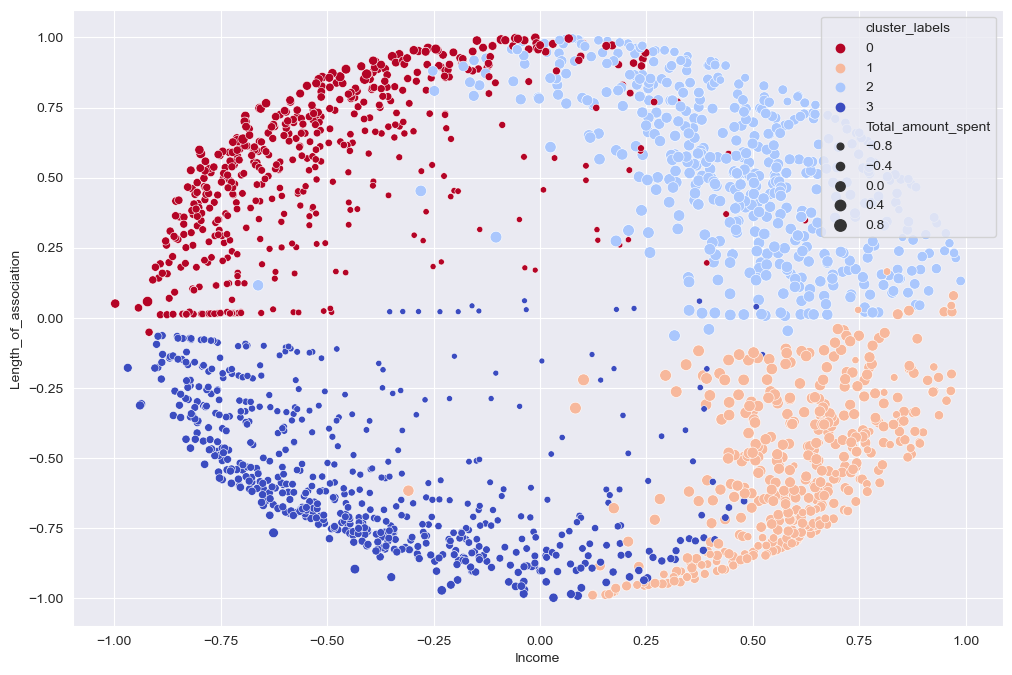

In [49]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=X.Income, y=X.Length_of_association,
                size=X.Total_amount_spent, hue=X.cluster_labels,
                palette='coolwarm_r')
plt.legend(loc='upper right')

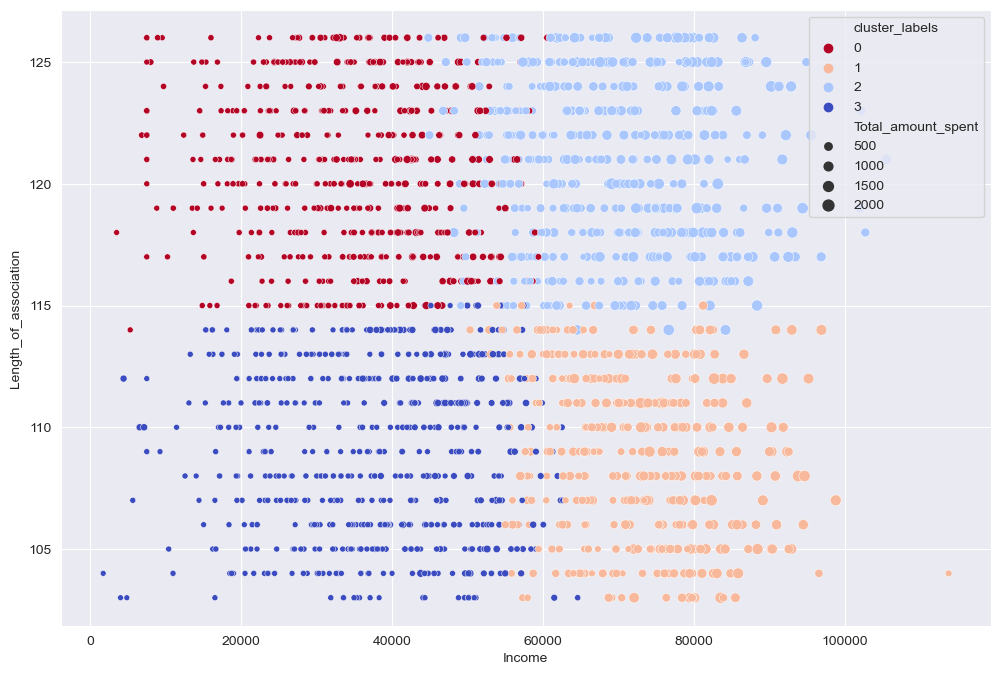

In [50]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=preprocessed_customer_data.Income, y=preprocessed_customer_data.Length_of_association,
                size=preprocessed_customer_data.Total_amount_spent, hue=preprocessed_customer_data.cluster_labels,
                palette='coolwarm_r')
plt.legend(loc='upper right')

In [53]:
fig = px.scatter_3d(x=X.Income, y=X.Length_of_association,
                z=X.Total_amount_spent, color=X.cluster_labels,)
fig.show()